<a href="https://colab.research.google.com/github/nishita339/machine-learning-projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (1).csv
Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv
Saving Car details v3.csv to Car details v3 (1).csv
Saving car details v4.csv to car details v4 (1).csv


In [3]:
car_dataset = pd.read_csv(next(iter(uploaded)))

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print("\n🔹 Dataset Info:")
car_dataset.info()
print("\n🔹 Missing Values Count:")
print(car_dataset.isnull().sum())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

🔹 Missing Values Count:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


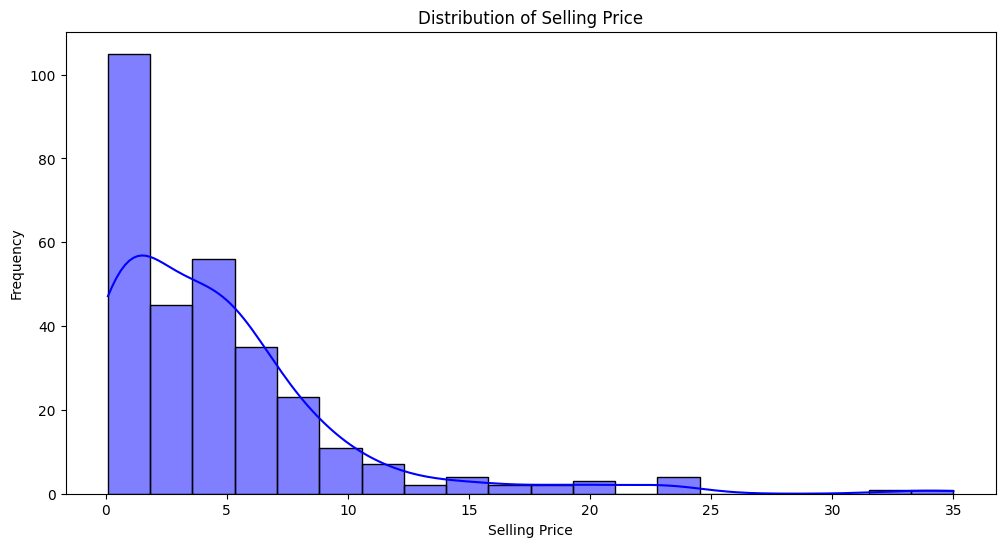

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(car_dataset['Selling_Price'], kde=True, bins=20, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [7]:
plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Fuel Type Distribution')

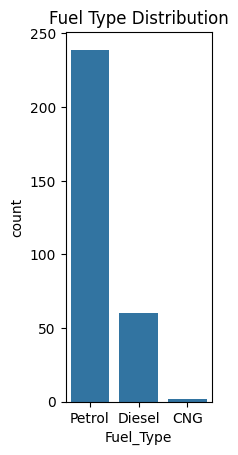

In [8]:
plt.subplot(1,3,1)
sns.countplot(x=car_dataset['Fuel_Type'])
plt.title("Fuel Type Distribution")

Text(0.5, 1.0, 'Seller Type Distribution')

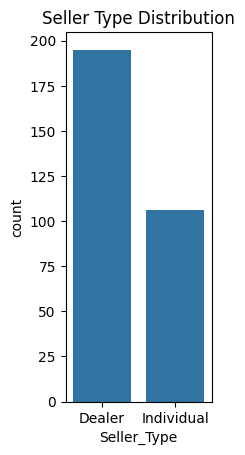

In [9]:
plt.subplot(1,3,2)
sns.countplot(x=car_dataset['Seller_Type'])
plt.title("Seller Type Distribution")

Text(0.5, 1.0, 'Transmission Type Distribution')

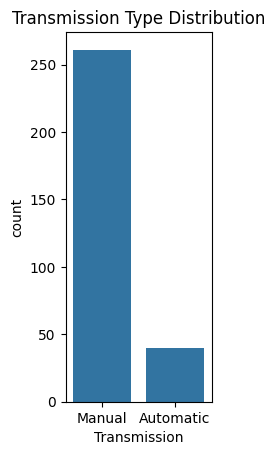

In [10]:
plt.subplot(1,3,3)
sns.countplot(x=car_dataset['Transmission'])
plt.title("Transmission Type Distribution")

In [11]:
plt.show()


In [12]:
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
                     'Seller_Type': {'Dealer': 0, 'Individual': 1},
                     'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


<ipython-input-12-b77b78cfaa28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},


Splitting Features and Target Variable

In [13]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

 Splitting into Training and Testing Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [15]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
train_pred = lin_reg_model.predict(X_train)
test_pred = lin_reg_model.predict(X_test)

In [17]:
train_r2 = metrics.r2_score(Y_train, train_pred)
test_r2 = metrics.r2_score(Y_test, test_pred)

In [18]:
print(f"\n🔹 Linear Regression R² Score (Train): {train_r2:.2f}")
print(f"🔹 Linear Regression R² Score (Test): {test_r2:.2f}")


🔹 Linear Regression R² Score (Train): 0.88
🔹 Linear Regression R² Score (Test): 0.84


Actual vs Predicted Prices



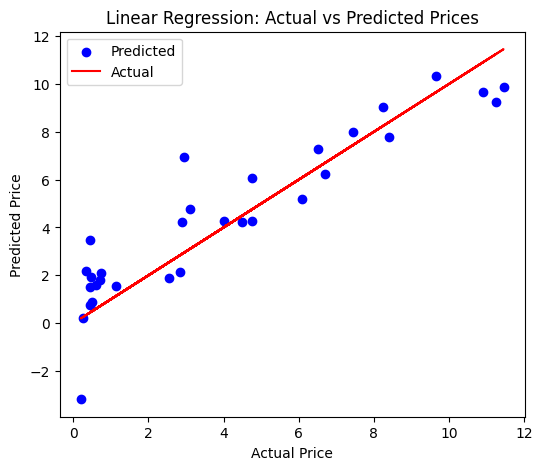

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(Y_test, test_pred, color='blue', label="Predicted")
plt.plot(Y_test, Y_test, color='red', label="Actual") # Line for actual values
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.show()

In [20]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [21]:
train_pred_lasso = lasso_model.predict(X_train)
test_pred_lasso = lasso_model.predict(X_test)

In [22]:
train_r2_lasso = metrics.r2_score(Y_train, train_pred_lasso)
test_r2_lasso = metrics.r2_score(Y_test, test_pred_lasso)

In [23]:
print(f"\n🔹 Lasso Regression R² Score (Train): {train_r2_lasso:.2f}")
print(f"🔹 Lasso Regression R² Score (Test): {test_r2_lasso:.2f}")


🔹 Lasso Regression R² Score (Train): 0.84
🔹 Lasso Regression R² Score (Test): 0.87


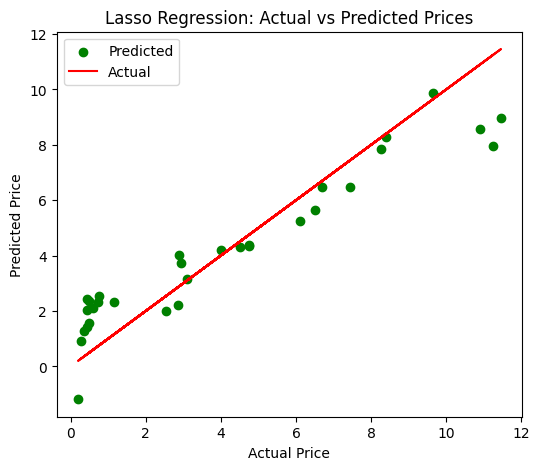

In [24]:
plt.figure(figsize=(6,5))
plt.scatter(Y_test, test_pred_lasso, color='green', label="Predicted")
plt.plot(Y_test, Y_test, color='red', label="Actual") # Line for actual values
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted Prices")
plt.legend()
plt.show()